In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car = pd.read_csv('quikr_car.csv')

In [4]:
car.head()

,name,company,year,Price,kms_driven,fuel_type,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2018,"80,000.0","45,000 kms",Petrol,NaN,NaN,NaN,NaN,NaN
1,Mahindra Jeep CL550 MDI,Mahindra,2019,"4,25,000",40 kms,Diesel,NaN,NaN,NaN,NaN,NaN
2,Maruti Suzuki Alto 800 Vxi,Maruti,2015,"10,000 kms","22,000 kms",Petrol,NaN,NaN,NaN,NaN,NaN
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,NaN,NaN,NaN,NaN,NaN
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2016,"5,75,000","36,000 kms",Diesel,NaN,NaN,NaN,NaN,NaN


In [5]:
car.shape

(845, 11)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         845 non-null    object 
 1   company      845 non-null    object 
 2   year         845 non-null    int64  
 3   Price        845 non-null    object 
 4   kms_driven   839 non-null    object 
 5   fuel_type    839 non-null    object 
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 72.7+ KB


In [7]:
# Cleaning part

In [31]:
# Ensure all values in the 'Price' column are strings
car['Price'] = car['Price'].astype(str)

car['Price'] = car['Price'].str.replace(',', '')  # Remove commas
car['Price'] = car['Price'].str.replace('.0', '')  # Remove '.0'

# Remove rows where 'Price' ends with 'kms'
car = car[~car['Price'].str.endswith('kms', na=False)]

# Convert the cleaned 'Price' column to integer, ignore errors
car['Price'] = pd.to_numeric(car['Price'], errors='coerce').fillna(0).astype(int)



In [32]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         845 non-null    object 
 1   company      845 non-null    object 
 2   year         845 non-null    int32  
 3   Price        845 non-null    int32  
 4   kms_driven   839 non-null    object 
 5   fuel_type    839 non-null    object 
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(5), int32(2), object(4)
memory usage: 66.1+ KB


In [37]:
# Ensure all values in 'kms_driven' are strings
car['kms_driven'] = car['kms_driven'].astype(str)

# Filter rows where 'kms_driven' is numeric and not NaN
car = car[car['kms_driven'].str.isnumeric()].copy()  # Make an explicit copy

# Convert the 'kms_driven' column to integer type
car['kms_driven'] = car['kms_driven'].astype(int)

In [38]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 842
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         837 non-null    object 
 1   company      837 non-null    object 
 2   year         837 non-null    int32  
 3   Price        837 non-null    int32  
 4   kms_driven   837 non-null    int32  
 5   fuel_type    837 non-null    object 
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(5), int32(3), object(3)
memory usage: 68.7+ KB


In [42]:
# List of columns you want to remove
columns_to_remove = ['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']

# Remove the specified columns
car = car.drop(columns=columns_to_remove)

# Optionally, save the cleaned DataFrame back to a CSV file
car.to_csv('cleaned_car_data.csv', index=False)

In [43]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 842
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    int32 
 3   Price       837 non-null    int32 
 4   kms_driven  837 non-null    int32 
 5   fuel_type   837 non-null    object
dtypes: int32(3), object(3)
memory usage: 36.0+ KB


In [45]:
# Remove NaN value from fuel_type
car=car[~car['fuel_type'].isna()]
car.shape

(837, 6)

In [46]:
# We only inculde starting 3 words for name and remove rest
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#Resetting the index of the final cleaned data
car=car.reset_index(drop=True)

In [47]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2018,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2019,425000,40,Diesel
2,Maruti Suzuki Alto,Maruti,2015,10000,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2016,575000,36000,Diesel
...,...,...,...,...,...,...
832,Maruti Suzuki Ritz,Maruti,2016,270000,50000,Petrol
833,Tata Indica V2,Tata,2014,110000,30000,Diesel
834,Toyota Corolla Altis,Toyota,2015,300000,132000,Petrol
835,Tata Zest XM,Tata,2016,260000,27000,Diesel


In [48]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,837,837,837.000000,8.370000e+02,837.000000,837
unique,258,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,52,229,NaN,NaN,NaN,440
mean,NaN,NaN,2016.021505,4.029290e+05,46034.457587,NaN
std,NaN,NaN,2.010622,4.735491e+05,34483.283332,NaN
min,NaN,NaN,2013.000000,1.000000e+04,0.000000,NaN
25%,NaN,NaN,2014.000000,1.650000e+05,25000.000000,NaN
50%,NaN,NaN,2016.000000,2.900000e+05,41000.000000,NaN
75%,NaN,NaN,2018.000000,4.899990e+05,56450.000000,NaN


In [51]:
car = car[car['Price']<6000000]

In [57]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [61]:
import seaborn as sns

C:\Users\rajku\AppData\Local\Temp\ipykernel_14748\1275582591.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


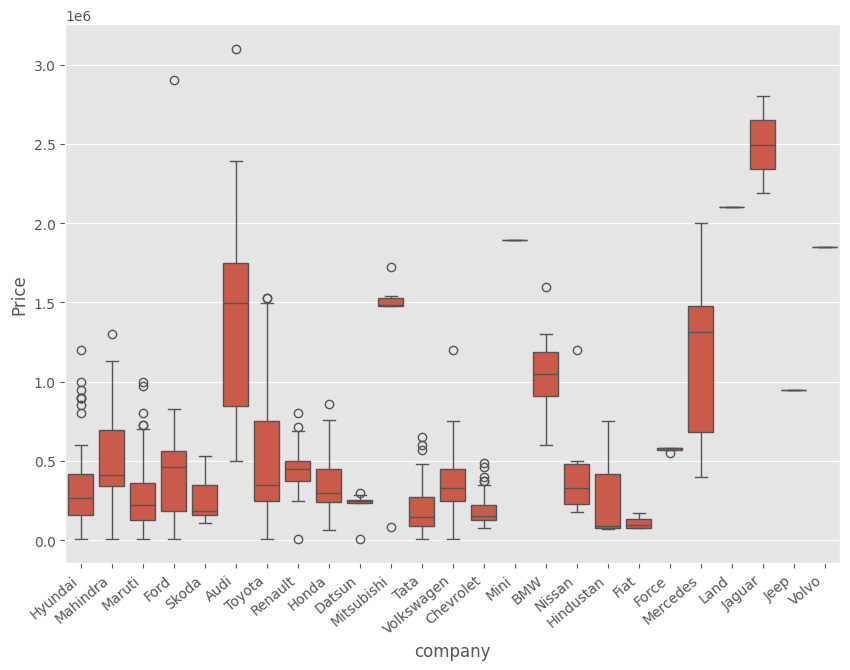

In [63]:
# Checking relationship of company and price

plt.subplots(figsize=(10,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\rajku\AppData\Local\Temp\ipykernel_14748\3400574402.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


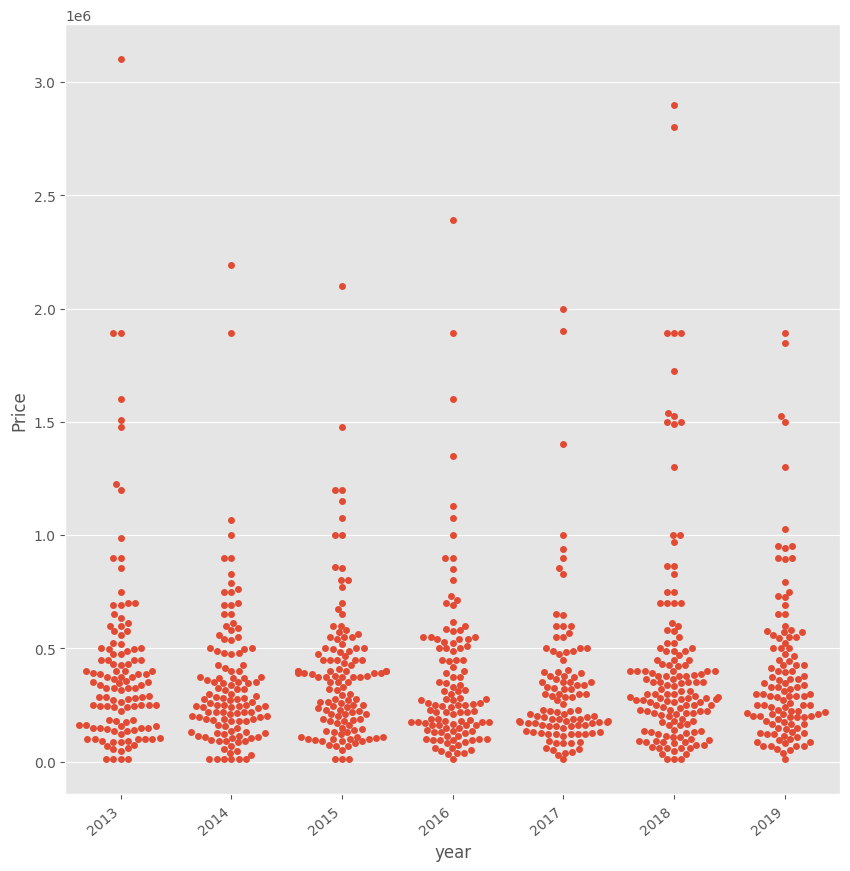

In [65]:
#Checking relationship of Year with Price

plt.subplots(figsize=(10,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

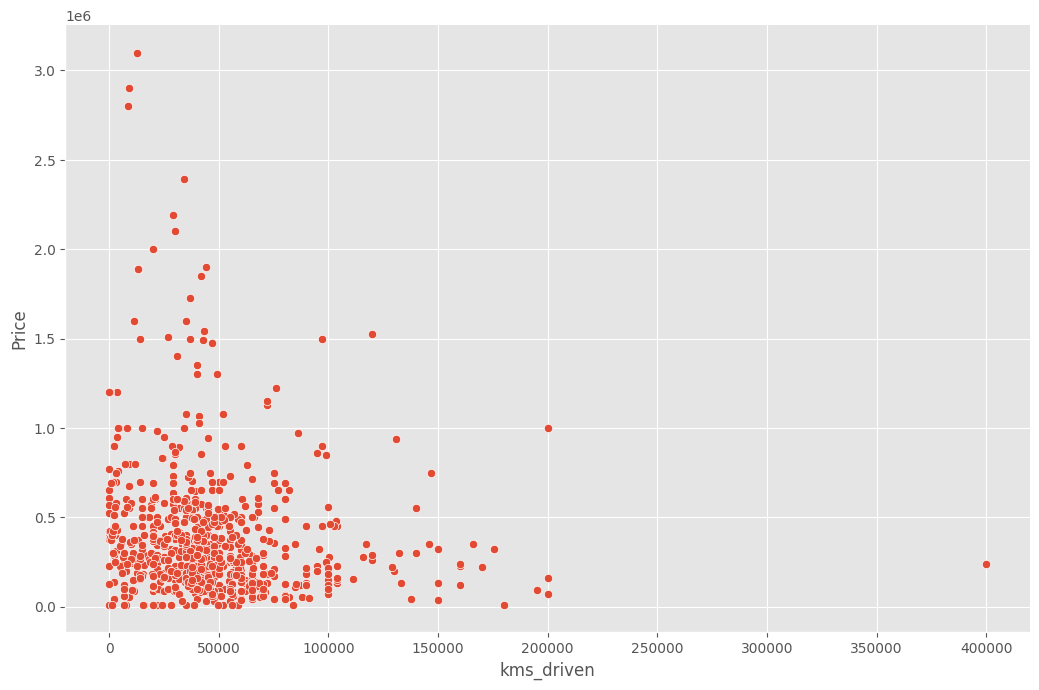

In [66]:
# Checking relationship of kms_driven with Price

sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

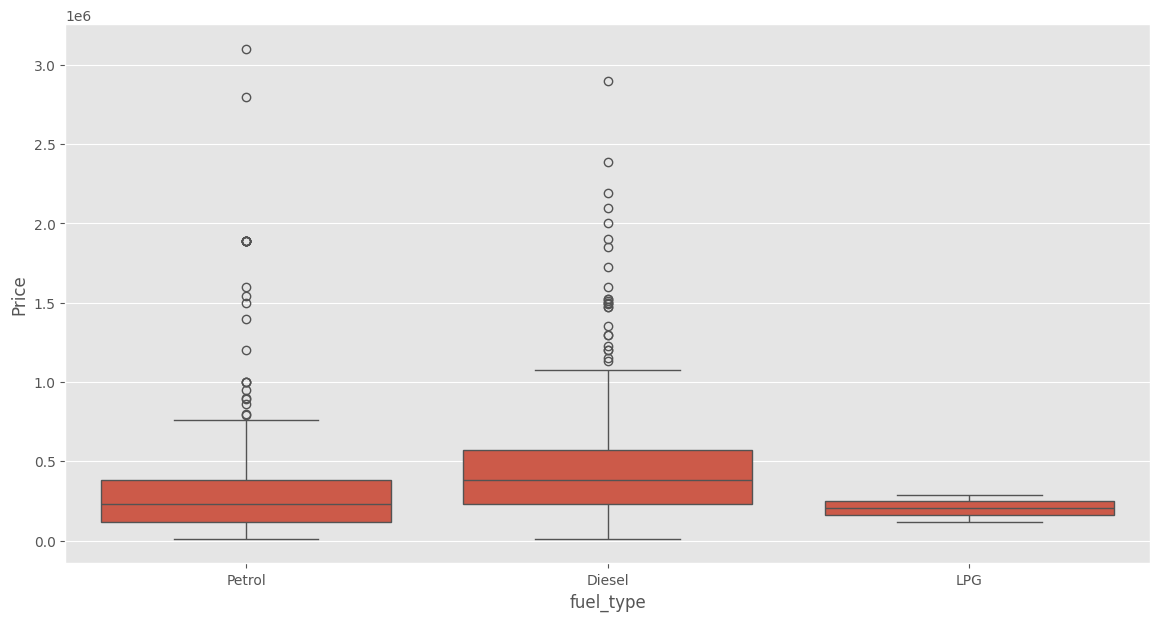

In [67]:
# Checking relationship of Fuel Type with Price

plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

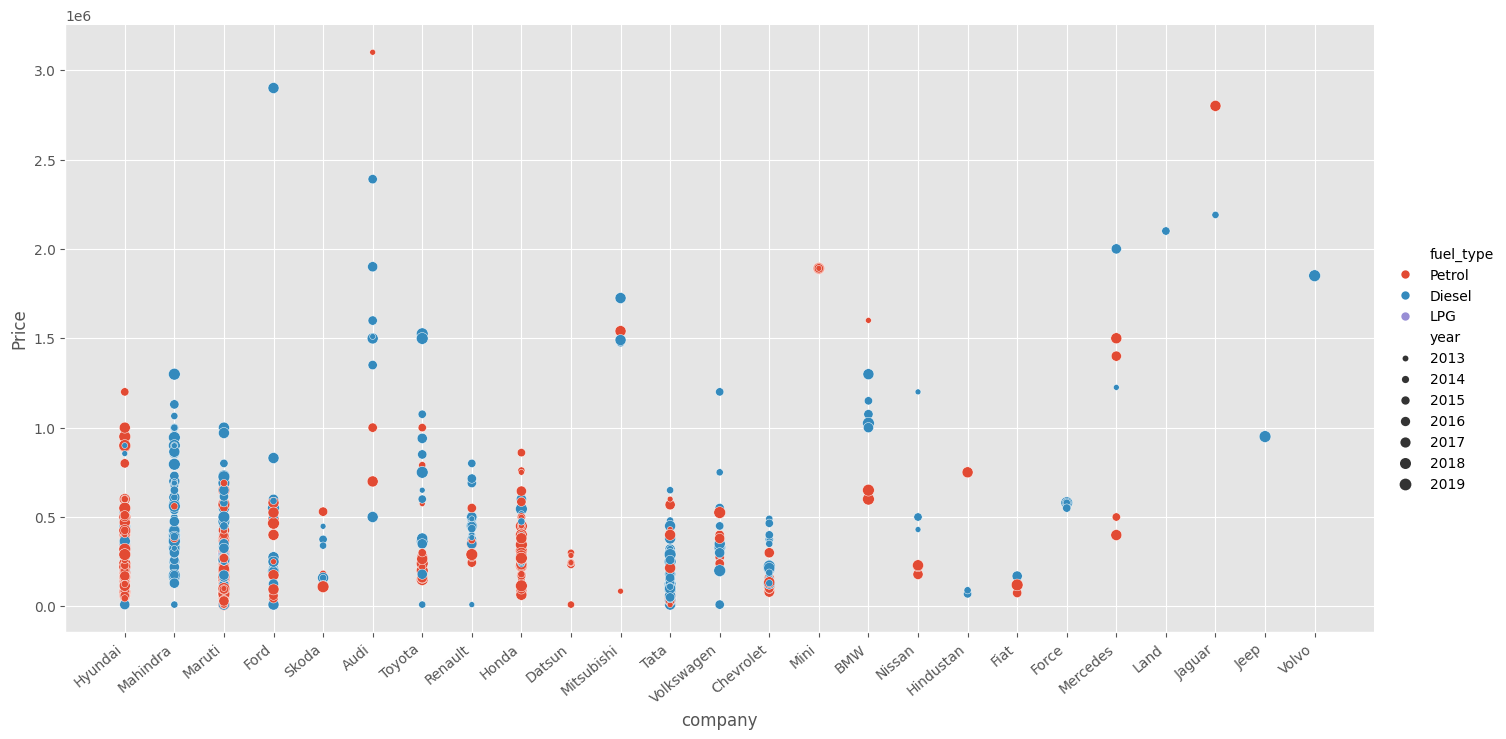

In [68]:
# Relationship of Price with FuelType, Year and Company mixed

ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [69]:
# Extracting Training Data

In [70]:
X = car[['name','company','year','kms_driven','fuel_type']]
y = car['Price']

In [71]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2018,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2019,40,Diesel
2,Maruti Suzuki Alto,Maruti,2015,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium,Ford,2016,36000,Diesel
...,...,...,...,...,...
832,Maruti Suzuki Ritz,Maruti,2016,50000,Petrol
833,Tata Indica V2,Tata,2014,30000,Diesel
834,Toyota Corolla Altis,Toyota,2015,132000,Petrol
835,Tata Zest XM,Tata,2016,27000,Diesel


In [73]:
y.shape

(836,)

In [74]:
# ML Activity

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [77]:
from sklearn.linear_model import LinearRegression

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [85]:
#Creating an OneHotEncoder object to contain all the possible categories

ohe = OneHotEncoder(categories='auto')
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [89]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
    remainder='passthrough',
    force_int_remainder_cols=False  # Use the new behavior for remainder columns
)

In [90]:
#Making a pipeline

pipe=make_pipeline(column_trans,lr)

In [91]:
#Fitting the model

pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d'...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [92]:
y_pred=pipe.predict(X_test)

In [93]:
#Checking R2 Score

r2_score(y_test,y_pred)

0.6387787268433321

In [94]:
#The purpose of this code is to evaluate the stability and generalization of the Linear Regression model by training it on different random splits of the data. By running 1000 iterations, the code will give a distribution of R-squared scores, which you can later analyze to see how consistent the model's performance is across different splits.
#This approach helps in understanding how well the model generalizes to unseen data.the model was found to give almost 0.86 as r2_score

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [95]:
np.argmax(scores)

841

In [96]:
scores[np.argmax(scores)]

0.8648899949519422

In [97]:
#This code snippet is used to obtain a prediction for a single new example, given the trained model and preprocessing pipeline. It's a way to see how the model would evaluate or predict the target value for the specified input data.

pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([246613.37420645])

In [98]:
#The best model is found at a certain random state

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8648899949519422

In [99]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([237102.33724152])

In [100]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese